In [252]:
import numpy as np 
import pandas as pd 
import math

import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import style

style.use('ggplot')



import os 


In [253]:
df=pd.read_csv('C:\\Users\\desai\\Documents\\summer-products-with-rating-and-performance_2020-08.csv')

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [255]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [256]:
cat_cols=[x for x in df.columns if df[x].dtype=='O']

In [257]:
cat_cols

['title',
 'title_orig',
 'currency_buyer',
 'tags',
 'product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'urgency_text',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_id',
 'merchant_profile_picture',
 'product_url',
 'product_picture',
 'product_id',
 'theme',
 'crawl_month']

In [258]:
num_cols=[x for x in df.columns if df[x].dtype!='O']

In [259]:
num_cols

['price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'product_variation_inventory',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture']

In [260]:
for col in df.columns:
    print(col,"\t",df[col].isna().mean()*100)

title 	 0.0
title_orig 	 0.0
price 	 0.0
retail_price 	 0.0
currency_buyer 	 0.0
units_sold 	 0.0
uses_ad_boosts 	 0.0
rating 	 0.0
rating_count 	 0.0
rating_five_count 	 2.860775588048315
rating_four_count 	 2.860775588048315
rating_three_count 	 2.860775588048315
rating_two_count 	 2.860775588048315
rating_one_count 	 2.860775588048315
badges_count 	 0.0
badge_local_product 	 0.0
badge_product_quality 	 0.0
badge_fast_shipping 	 0.0
tags 	 0.0
product_color 	 2.6064844246662426
product_variation_size_id 	 0.8900190718372537
product_variation_inventory 	 0.0
shipping_option_name 	 0.0
shipping_option_price 	 0.0
shipping_is_express 	 0.0
countries_shipped_to 	 0.0
inventory_total 	 0.0
has_urgency_banner 	 69.93006993006993
urgency_text 	 69.93006993006993
origin_country 	 1.080737444373808
merchant_title 	 0.0
merchant_name 	 0.25429116338207247
merchant_info_subtitle 	 0.06357279084551812
merchant_rating_count 	 0.0
merchant_rating 	 0.0
merchant_id 	 0.0
merchant_has_profile_pictur

In [261]:
df['units_sold'].astype('O').value_counts()



100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
3           2
2           2
6           1
Name: units_sold, dtype: int64

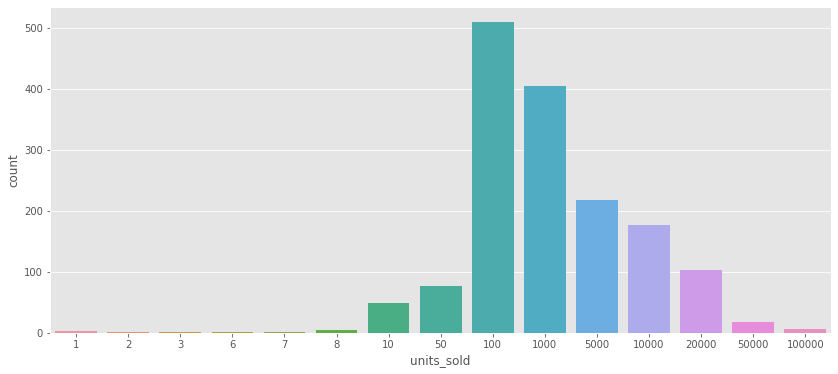

In [262]:
## Inspecting the target variable units_sold
plt.figure(figsize=(14,6))
sns.countplot(data=df,x="units_sold")
## 9 significant categories in the units_sold which is a discrete variable the remaining categories can be replaced by the
# values closest to them 1,2,3,6,7,8 are the closest in value to 10 units sold


In [263]:
units_sold_list=list(df['units_sold'].astype('O').value_counts().index)

In [264]:
units_sold_list

[100, 1000, 5000, 10000, 20000, 50, 10, 50000, 100000, 8, 1, 7, 3, 2, 6]

In [265]:
for val in units_sold_list:
    if (val == 8 or val ==1 or val==7 or val==3 or val ==2 or val==6):
        df['units_sold']=df['units_sold'].replace(val,10)
       

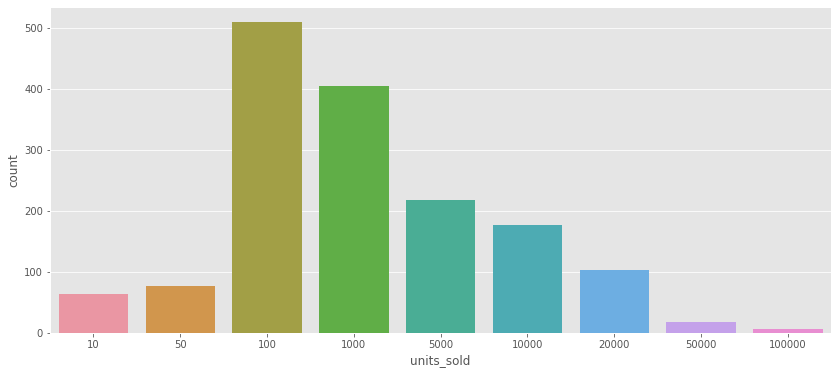

In [266]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x="units_sold")

In [267]:
df['product_color'].value_counts()

black           302
white           254
yellow          105
blue             99
pink             99
               ... 
ivory             1
red & blue        1
star              1
leopardprint      1
Rose red          1
Name: product_color, Length: 101, dtype: int64

In [268]:
color_list=list(df['product_color'].value_counts().index)

In [269]:
for x in color_list:
    print(x)

black
white
yellow
blue
pink
red
green
grey
purple
armygreen
navyblue
winered
orange
multicolor
beige
lightblue
khaki
gray
white & green
skyblue
rosered
brown
coffee
darkblue
floral
rose
leopard
lightpink
black & green
navy
fluorescentgreen
White
lightgreen
black & white
camouflage
Black
orange-red
pink & blue
watermelonred
wine
lightyellow
burgundy
Army green
applegreen
camel
pink & grey
coolblack
mintgreen
navy blue
white & black
pink & black
pink & white
coralred
lightred
apricot
Pink
black & yellow
lakeblue
black & blue
whitefloral
silver
dustypink
army green
army
light green
brown & yellow
offwhite
gold
black & stripe
orange & camouflage
lightpurple
navyblue & white
wine red
greysnakeskinprint
blue & pink
gray & white
offblack
lightgray
lightkhaki
nude
denimblue
RED
prussianblue
white & red
lightgrey
whitestripe
claret
jasper
blackwhite
rosegold
violet
tan
darkgreen
rainbow
winered & yellow
Blue
ivory
red & blue
star
leopardprint
Rose red


In [270]:
for x in color_list:
    if '&' in x:
        df['product_color']=df['product_color'].replace(x,'dual')
    

In [271]:
for x in color_list:
    if 'green' in x or 'khaki' in x:
         df['product_color']=df['product_color'].replace(x,'green')

In [272]:
for x in color_list:
    if 'blue' in x or 'navy'  in x :
          df['product_color']=df['product_color'].replace(x,'blue')

In [273]:
for x in color_list:
    if 'red' in x or 'rose'  in x :
          df['product_color']=df['product_color'].replace(x,'red')

In [274]:
df['product_color'] = df['product_color'].replace('Black', 'black')
df['product_color'] = df['product_color'].replace('White', 'white')


df['product_color'] = df['product_color'].replace('lightpink', 'pink')

df['product_color'] = df['product_color'].replace('gray', 'grey')

df['product_color'] = df['product_color'].replace('coffee', 'brown')

df['product_color'] = df['product_color'].replace('multicolor', 'other')
df['product_color'] = df['product_color'].replace('floral', 'other')
df['product_color'] = df['product_color'].replace('leopard', 'other')
df['product_color'] = df['product_color'].replace('camouflage', 'other')


    
df['product_color'] =df['product_color'].replace(np.nan, 'other')

In [275]:
df['product_color'] = df['product_color'].replace('apricot', 'other')
df['product_color'] = df['product_color'].replace('camel', 'yellow')
df['product_color'] = df['product_color'].replace('lightyellow', 'yellow')
df['product_color'] = df['product_color'].replace('burgundy', 'red')
df['product_color'] = df['product_color'].replace('wine', 'red')
df['product_color'] = df['product_color'].replace('silver', 'other')
df['product_color'] = df['product_color'].replace('whitefloral', 'white')


In [276]:
df['product_color'] = df['product_color'].replace('RED', 'red')

In [277]:
df['product_color'].value_counts()

black                 305
white                 259
blue                  163
red                   151
green                 150
yellow                109
pink                  103
grey                   82
other                  77
purple                 53
dual                   40
orange                 27
beige                  14
brown                  14
dustypink               2
Pink                    2
coolblack               2
blackwhite              1
star                    1
offwhite                1
nude                    1
gold                    1
greysnakeskinprint      1
lightgray               1
offblack                1
whitestripe             1
ivory                   1
jasper                  1
lightpurple             1
rainbow                 1
tan                     1
Blue                    1
leopardprint            1
violet                  1
lightgrey               1
claret                  1
army                    1
Name: product_color, dtype: int64

In [278]:
df['shipping_is_express'].astype('O').value_counts()

0    1569
1       4
Name: shipping_is_express, dtype: int64

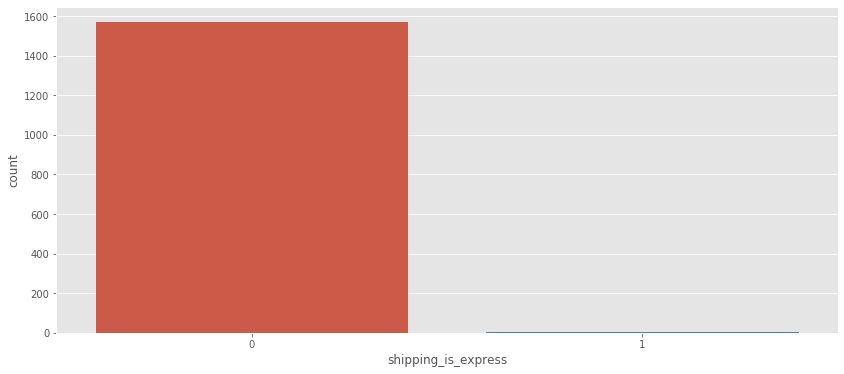

In [279]:
plt.figure(figsize=(14,6))
sns.countplot(x='shipping_is_express',data=df)
##Majority items are not shipped under express shipping

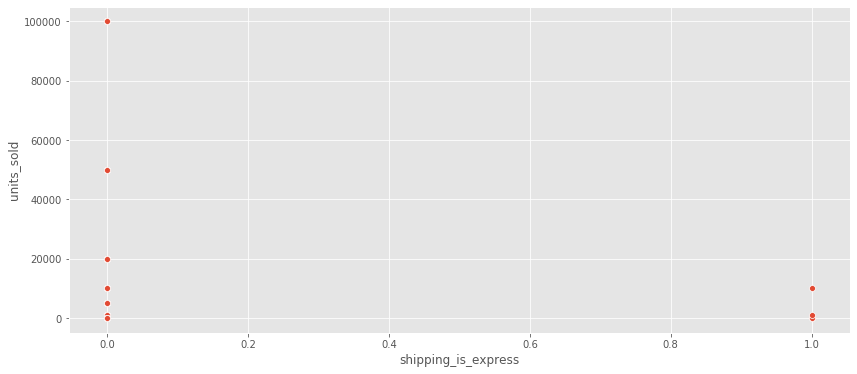

In [280]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='shipping_is_express',y='units_sold',data=df)

## The shipping methods influence on units sold can not be aptly inferred as only four products use express shipping but it 
## can be observed that the highest units sold is for products without express shipping

In [281]:
df['origin_country'].astype('O').value_counts()

CN    1516
US      31
VE       5
SG       2
AT       1
GB       1
Name: origin_country, dtype: int64

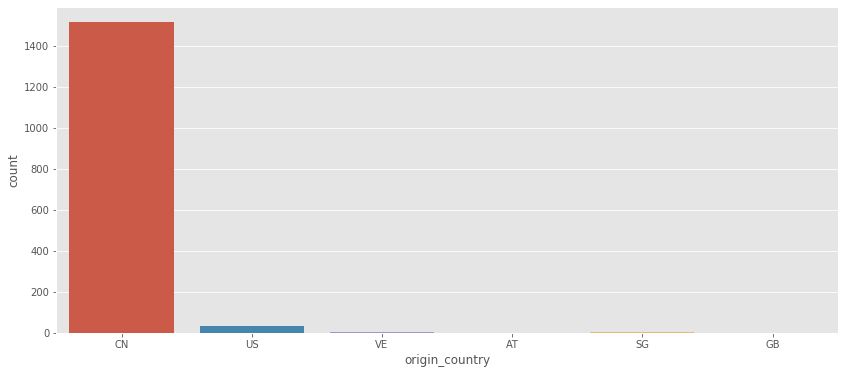

In [282]:
plt.figure(figsize=(14,6))
sns.countplot(x='origin_country',data=df)

## Majority of goods are manufactured in China,we can observe China as a manufacturing hub
## US comes in second with 31 products ,the remaining countries can all be clubbed under others as they dont contribute significantly

In [283]:
country_list=list(df['origin_country'].astype('O').value_counts().index)

In [284]:
country_list

['CN', 'US', 'VE', 'SG', 'AT', 'GB']

In [285]:
for x in country_list:
    if x!='US'and x!='CN':
        df['origin_country']=df['origin_country'].replace(x,'OTHER')
        
df['origin_country']=df['origin_country'].replace(np.nan,'OTHER')    

In [286]:
df['origin_country'].astype('O').value_counts()

CN       1516
US         31
OTHER      26
Name: origin_country, dtype: int64

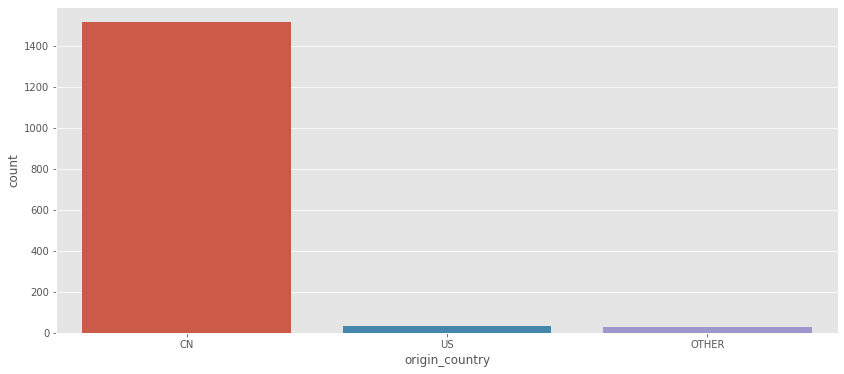

In [287]:
plt.figure(figsize=(14,6))
sns.countplot(x='origin_country',data=df)

In [288]:
def null_val_viz(df):
    cols_with_null=[col for col in df.columns if df[col].isna().mean()>0]
    pct_null_vals=df[cols_with_null].isna().mean()*100 
    plt.figure(figsize=(14,6))
    sns.barplot(y=pct_null_vals.index,x=pct_null_vals,orient='h')
    plt.title("NA VALUES BY COLUMN")
    

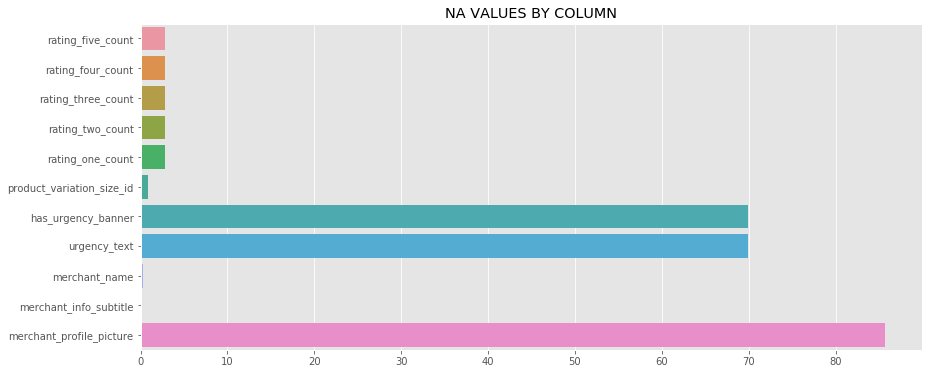

In [289]:
null_val_viz(df)

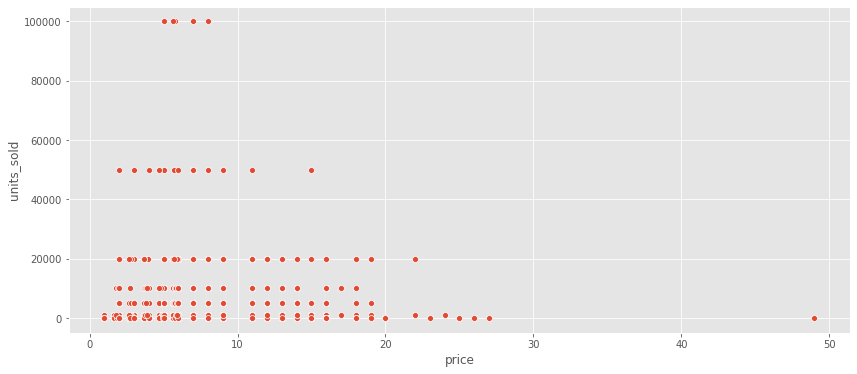

In [290]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df,x="price",y="units_sold")

## products between 1 and 10 euros have a few products with 100000 units sold and products priced between 10 and 20 euros cap
## at about 50000 units sold
### products priced between 20 and 30 euros cap at 20000 units sold while premium prodcuts priced slightly less than 50 euros 
## has one unit sold
## Highest variability in sales is between low and mid priced products

In [291]:
df["units_sold"].describe()

count      1573.000000
mean       4339.052765
std        9356.517210
min          10.000000
25%         100.000000
50%        1000.000000
75%        5000.000000
max      100000.000000
Name: units_sold, dtype: float64

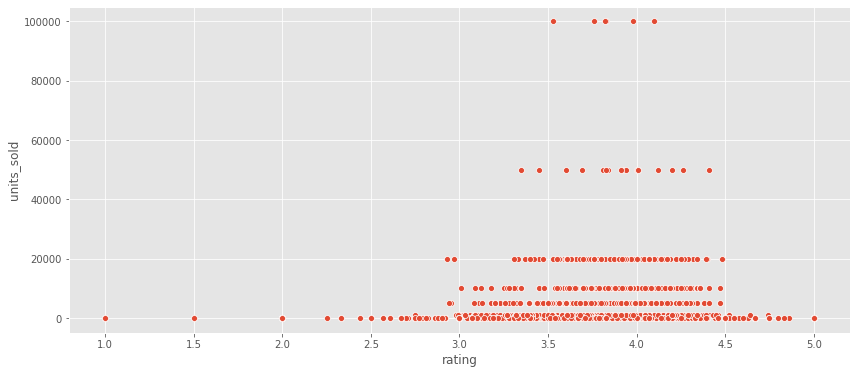

In [292]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df,x="rating",y="units_sold")

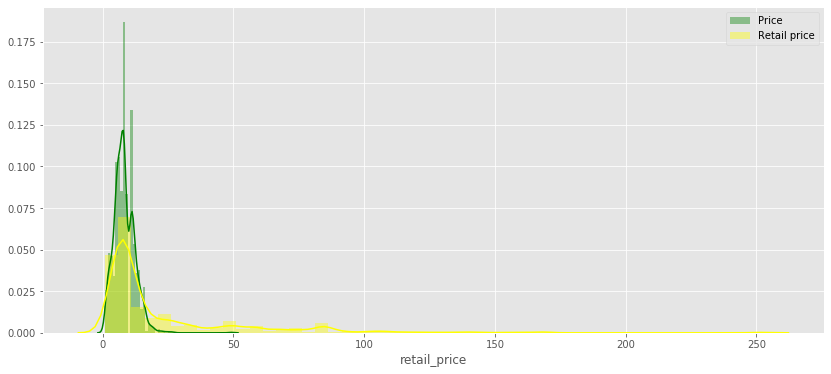

In [293]:
plt.figure(figsize=(14,6))
sns.distplot(df['price'], color='green', label='Price')
sns.distplot(df['retail_price'], color='yellow', label='Retail price')
plt.legend();

 

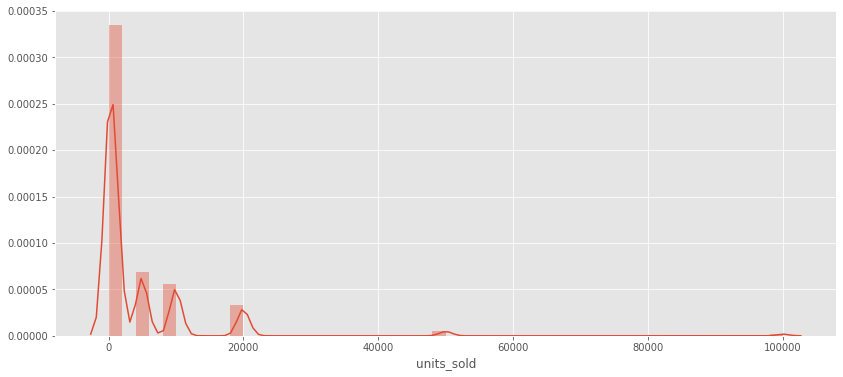

In [294]:
plt.figure(figsize=(14,6))
sns.distplot(df['units_sold'].astype('O'))

In [295]:

pd.crosstab(df['units_sold'],df['uses_ad_boosts'])

uses_ad_boosts,0,1
units_sold,,
10,51,12
50,50,26
100,265,244
1000,218,187
5000,134,83
10000,104,73
20000,54,49
50000,13,4
100000,3,3


In [296]:
df_use_boost=df[df['uses_ad_boosts']== 1]
df_not_use_boost=df[df['uses_ad_boosts']== 0]


# T test to test if using an ad boost aka advertising leads to a statistically significant difference in units sold


In [297]:
from scipy.stats import ttest_ind
ttest_ind(df_use_boost['units_sold'],df_not_use_boost['units_sold'])
## H0:Mean units sold for products with ad boosts - Mean units sold for products without ad boosts == 0
##HA:Mean units sold for products with ad boosts - Mean units sold for products without ad boosts  !=0
###Difference in mean units sold for populations using ad boosts and  not using ad boosts
## A very high p value suggests we cannot reject the null hypothesis aka zero differences in 
## mean units_sold by presence and absence of ad boosts

Ttest_indResult(statistic=-0.6366135952426362, pvalue=0.5244693118867922)

In [298]:
df['badge_local_product'].astype('O').value_counts()

0    1544
1      29
Name: badge_local_product, dtype: int64

In [299]:
local_vec=df['badge_local_product'].astype('O')

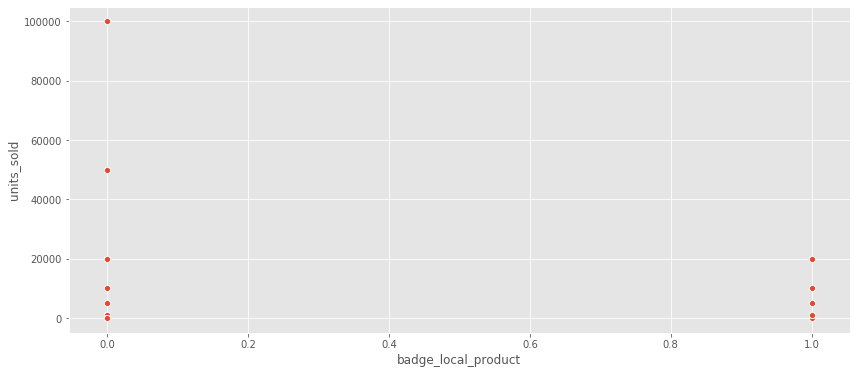

In [300]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=local_vec,y=df["units_sold"])

In [301]:
df_local_product_badge=df[df['badge_local_product']== 1]
df_no_local_product_badge=df[df['badge_local_product']== 0]

# T test to test if having a quality badge leads to a statistically significant difference in units sold


In [302]:
ttest_ind(df_local_product_badge['units_sold'],df_no_local_product_badge['units_sold'])
## H0:Mean units sold for productis with local badge - Mean units sold for productis without local badge == 0
##HA:Mean units sold for productis with local badge - Mean units sold for productis without local badge != 0
## p value greater than 0.05 we cannot reject the null hyptothesis hence there's no statistically significant effect of the 
## presence of local product badge on units sold

Ttest_indResult(statistic=-0.29904398915562086, pvalue=0.7649460350364422)

In [303]:
df['badge_product_quality'].astype('O').value_counts()

0    1456
1     117
Name: badge_product_quality, dtype: int64

In [304]:
df_has_quality_badge=df[df['badge_product_quality']== 1]
df_no_quality_badge=df[df['badge_product_quality']== 0]

# T test to test if having a quality badge leads to a statistically significant difference in units sold


In [305]:
ttest_ind(df_has_quality_badge['units_sold'],df_no_quality_badge['units_sold'])
## H0:Mean units sold for productis with quality badge - Mean units sold for productis without quality badge == 0
##HA:Mean units sold for productis with quality badge - Mean units sold for productis without quality badge != 0
## p value less than 0.05 we can reject the null hyptothesis hence there's a statistically significant effect of the 
## presence of quality badge on units sold

Ttest_indResult(statistic=2.5094220198687944, pvalue=0.012192822862074305)

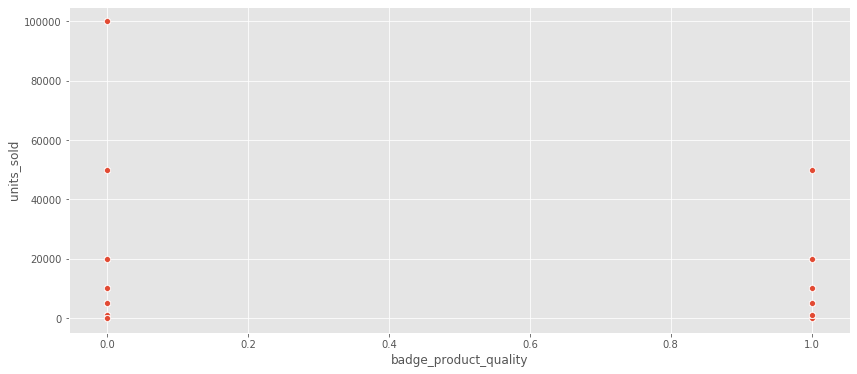

In [306]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=df['badge_product_quality'].astype('O'),y=df["units_sold"])

In [307]:
df['product_variation_size_id'].value_counts()

S                      641
XS                     356
M                      200
XXS                    100
L                       49
                      ... 
SIZE S                   1
AU plug Low quality      1
SIZE XXS                 1
S (waist58-62cm)         1
SIZE-4XL                 1
Name: product_variation_size_id, Length: 106, dtype: int64

In [308]:
df['product_variation_size_id'].value_counts().index

Index(['S', 'XS', 'M', 'XXS', 'L', 'S.', 'XL', 'XXL', 'XXXS', 'Size S',
       ...
       'Size--S', 'Size-L', 'S/M(child)', 'L.', '100 cm', 'SIZE S',
       'AU plug Low quality', 'SIZE XXS', 'S (waist58-62cm)', 'SIZE-4XL'],
      dtype='object', length=106)

In [309]:
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size -XXS', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE-XXS', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size S.', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('s', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SizeL', 'L')

df['product_variation_size_id'] =df['product_variation_size_id'].replace('5XL', 'XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('4XL', 'XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('3XL', 'XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('2XL', 'XL')

In [310]:
for x in df['product_variation_size_id'].value_counts().index:
     if x != 'XXXS' \
    and x != 'XXS' \
    and x != 'XS' \
    and x != 'S' \
    and x != 'M' \
    and x != 'L' \
    and x != 'XL' \
    and x != 'XXL' \
    and x != 'XXXXL' \
    and x != 'XXXXXL':
            df['product_variation_size_id']= df['product_variation_size_id'].replace(x,'other')
           

In [311]:
df['product_variation_size_id']= df['product_variation_size_id'].replace(np.nan,'other')

In [312]:
df['product_variation_size_id'].value_counts()

S         652
XS        356
M         200
other     158
XXS       100
L          52
XL         30
XXL        15
XXXS        6
XXXXXL      2
XXXXL       2
Name: product_variation_size_id, dtype: int64

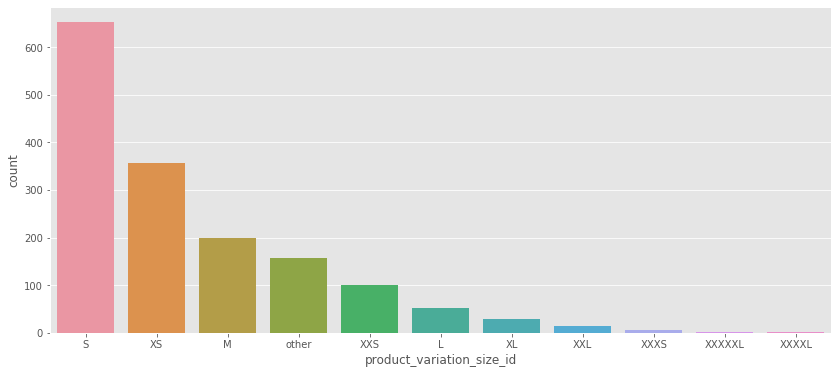

In [313]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='product_variation_size_id',order=df['product_variation_size_id'].value_counts().index)

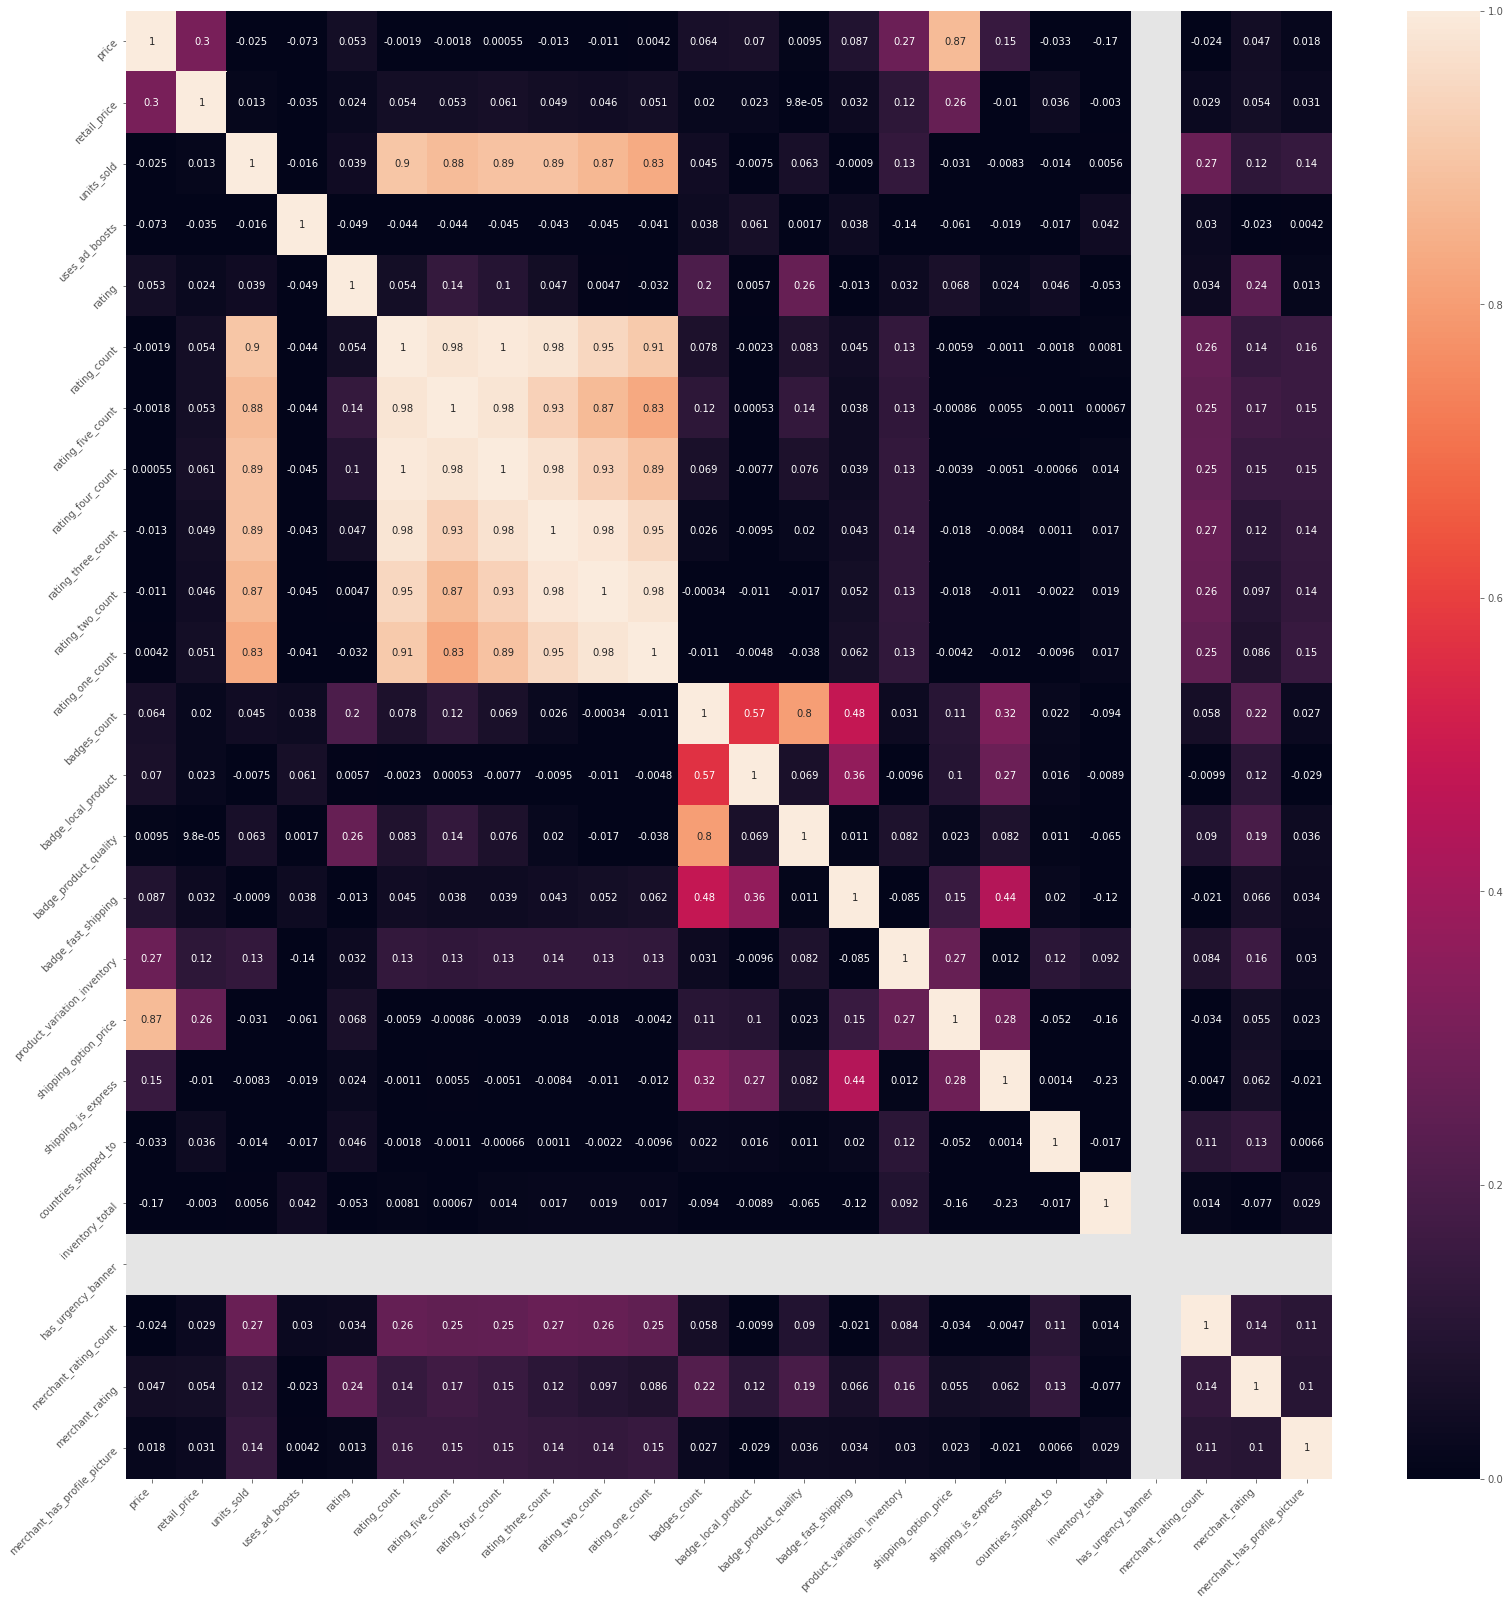

In [314]:
fig,ax=plt.subplots(figsize=(27,27))
fig=sns.heatmap(data=df.corr(),annot=True,cbar=True,vmin=0,vmax=1,ax=ax)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

In [315]:
df['has_urgency_banner'].replace(np.nan,0,inplace=True)

In [316]:
df.drop(['title','title_orig','currency_buyer','merchant_title','crawl_month','product_id','product_picture', 
         'product_url', 'merchant_profile_picture', 'merchant_id', 'currency_buyer','theme','urgency_text',
         'merchant_info_subtitle','title','title_orig','tags','shipping_option_name'],axis=1,inplace=True)

In [317]:
df.drop(['rating_count'],axis=1,inplace=True)

In [318]:
## Rating count suggests the number of ratings for every product but the same information is conveyed by the
## breakdown of the number of each type of rating rating_five_count to rating_one_count columns,hence due to redundancy
## we can drop this column.

In [319]:
df.drop(['merchant_name'],axis=1,inplace=True)

In [320]:
df['rating_five_count'].describe()

count     1528.000000
mean       442.263743
std        980.203270
min          0.000000
25%         12.000000
50%         79.000000
75%        413.500000
max      11548.000000
Name: rating_five_count, dtype: float64

In [324]:
df.isna().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

In [325]:
df['rating_four_count'].replace(np.nan,0,inplace=True)
df['rating_five_count'].replace(np.nan,0,inplace=True)
df['rating_three_count'].replace(np.nan,0,inplace=True)
df['rating_two_count'].replace(np.nan,0,inplace=True)
df['rating_one_count'].replace(np.nan,0,inplace=True)

In [326]:
df.isna().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

In [328]:
df=pd.get_dummies(df,columns=['product_color'],prefix='COLOR_',drop_first=True)



In [329]:
df=pd.get_dummies(df,columns=['origin_country'],prefix='origin_',drop_first=True)

In [331]:
df.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture', 'COLOR__Pink',
       'COLOR__army', 'COLOR__beige', 'COLOR__black', 'COLOR__blackwhite',
       'COLOR__blue', 'COLOR__brown', 'COLOR__claret', 'COLOR__coolblack',
       'COLOR__dual', 'COLOR__dustypink', 'COLOR__gold', 'COLOR__green',
       'COLOR__grey', 'COLOR__greysnakeskinprint', 'COLOR__ivory',
       'COLOR__jasper', 'COLOR__leopardprint', 'COLOR__lightgray',
       'COLOR__lightgrey', 'COLOR__lightpurple', 'COLOR__nude',
 

In [332]:
df=pd.get_dummies(df,columns = ['product_variation_size_id'],prefix = 'prodsize_',drop_first = True)

In [335]:
df.head(20)

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,...,prodsize__M,prodsize__S,prodsize__XL,prodsize__XS,prodsize__XXL,prodsize__XXS,prodsize__XXXS,prodsize__XXXXL,prodsize__XXXXXL,prodsize__other
0,16.00,14,100,0,3.76,26.0,8.0,10.0,1.0,9.0,...,1,0,0,0,0,0,0,0,0,0
1,8.00,22,20000,1,3.45,2269.0,1027.0,1118.0,644.0,1077.0,...,0,0,0,1,0,0,0,0,0,0
2,8.00,43,100,0,3.57,5.0,4.0,2.0,0.0,3.0,...,0,0,0,1,0,0,0,0,0,0
3,8.00,8,5000,1,4.03,295.0,119.0,87.0,42.0,36.0,...,1,0,0,0,0,0,0,0,0,0
4,2.72,3,100,1,3.10,6.0,4.0,2.0,2.0,6.0,...,0,1,0,0,0,0,0,0,0,0
5,3.92,9,10,0,5.00,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
6,7.00,6,50000,0,3.84,3172.0,1352.0,971.0,490.0,757.0,...,0,0,0,1,0,0,0,0,0,0
7,12.00,11,1000,0,3.76,120.0,56.0,61.0,18.0,31.0,...,0,0,0,0,0,0,0,0,0,1
8,11.00,84,100,1,3.47,6.0,2.0,3.0,1.0,3.0,...,1,0,0,0,0,0,0,0,0,0
9,5.78,22,5000,0,3.60,287.0,128.0,92.0,68.0,112.0,...,0,1,0,0,0,0,0,0,0,0


In [334]:
df.to_csv('preprocessed_ecom.csv')

In [350]:
X=df.drop(['units_sold'],axis=1)
y=df['units_sold']

In [351]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [356]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import GridSearchCV
lr=lr(max_iter=10000,multi_class='multinomial',solver='saga',random_state = 10)
lr.fit(X_train,y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=10, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [362]:
print(f"Training data accuracy : {lr.score(X_train,y_train)}")


Training data accuracy : 0.31244323342415986


In [364]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_lr = lr.predict(X_test)
print(f"Test data accuracy : {accuracy_score(y_test, y_pred_lr)}")

Test data accuracy : 0.298728813559322


In [367]:

from sklearn.tree import DecisionTreeClassifier

classifier_DT = DecisionTreeClassifier(random_state = 10)
classifier_DT.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

[Text(139.72743389423078, 211.04470588235293, 'X[6] <= 12.5\ngini = 0.789\nsamples = 1101\nvalue = [45, 47, 361, 276, 158, 117, 76, 15, 6]'),
 Text(64.15907451923077, 198.25411764705882, 'X[4] <= 1.5\ngini = 0.464\nsamples = 471\nvalue = [45, 47, 336, 42, 1, 0, 0, 0, 0]'),
 Text(25.130769230769232, 185.4635294117647, 'X[1] <= 13.5\ngini = 0.642\nsamples = 91\nvalue = [40, 20, 31, 0, 0, 0, 0, 0, 0]'),
 Text(17.03076923076923, 172.6729411764706, 'X[6] <= 0.5\ngini = 0.637\nsamples = 55\nvalue = [14, 15, 26, 0, 0, 0, 0, 0, 0]'),
 Text(12.461538461538462, 159.88235294117646, 'X[20] <= 4.202\ngini = 0.665\nsamples = 41\nvalue = [13, 15, 13, 0, 0, 0, 0, 0, 0]'),
 Text(8.307692307692308, 147.09176470588235, 'X[5] <= 0.5\ngini = 0.627\nsamples = 32\nvalue = [11, 15, 6, 0, 0, 0, 0, 0, 0]'),
 Text(4.984615384615385, 134.30117647058825, 'X[8] <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [11, 12, 0, 0, 0, 0, 0, 0, 0]'),
 Text(3.3230769230769233, 121.51058823529411, 'X[19] <= 45.0\ngini = 0.457\nsam

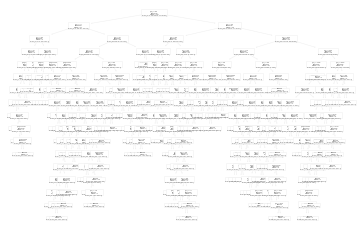

In [368]:
from sklearn import tree
tree.plot_tree(classifier_DT)

In [372]:
from sklearn.model_selection import cross_val_score
print(f"Training data cross val accuracy :{np.mean(cross_val_score(classifier_DT,X_train,y_train,cv=5))}")

Training data cross val accuracy :0.666659810777458


In [373]:

y_pred_DT = classifier_DT.predict(X_test)
print(f"Test data accuracy : {accuracy_score(y_test, y_pred_DT)}")

Test data accuracy : 0.7161016949152542


In [374]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
print(f"Training data cross val accuracy :{np.mean(cross_val_score(XGB,X_train,y_train,cv=5))}")

Training data cross val accuracy :0.7493048128342246


In [375]:
##XGB tends to overfit slightly
y_pred_DT = classifier_DT.predict(X_test)
print(f"Test data accuracy : {accuracy_score(y_test, y_pred_DT)}")

Test data accuracy : 0.7161016949152542


In [377]:
from sklearn.ensemble import AdaBoostClassifier
ADB_Classifier=AdaBoostClassifier()
ADB_Classifier.fit(X_train,y_train)
print(f"Training data cross val accuracy :{np.mean(cross_val_score(ADB_Classifier,X_train,y_train,cv=5))}")

Training data cross val accuracy :0.5231715343480049


In [378]:
y_pred_ADB = ADB_Classifier.predict(X_test)
print(f"Test data accuracy : {accuracy_score(y_test, y_pred_ADB)}")

Test data accuracy : 0.5338983050847458


In [379]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

print(f"Training data cross val accuracy :{np.mean(cross_val_score(RFC,X_train,y_train,cv=5))}")

Training data cross val accuracy :0.75475935828877


In [380]:
y_pred_RFC = RFC.predict(X_test)
print(f"Test data accuracy : {accuracy_score(y_test, y_pred_RFC)}")

Test data accuracy : 0.7754237288135594


In [381]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
print(f"Training data cross val accuracy :{np.mean(cross_val_score(GBC,X_train,y_train,cv=5))}")

Training data cross val accuracy :0.7347758124228714


In [383]:
y_pred_GBC = GBC.predict(X_test)
print(f"Test data accuracy : {accuracy_score(y_test, y_pred_GBC)}")

Test data accuracy : 0.7351694915254238


In [386]:
classifiers=[classifier_DT,GBC,RFC,ADB_Classifier,XGB]
name_keys=["Decision_Tree","Gradient_Boosting_Classifier","Random_Forest_Classifier","AdaBoostClassifier","XGBoost"]
mean_cross_val_score=[]
for clf in classifiers:
    accuracies = cross_val_score(estimator = clf, 
                                 X = X_train, 
                                 y = y_train, 
                                 cv = 5)
    mean_cross_val_score.append(np.mean(accuracies)*100)

    
accuracies = pd.DataFrame({'Classifier': name_keys,
                           'mean_cross_val_score': mean_cross_val_score})
accuracies.sort_values('mean_cross_val_score',ascending=False)
    

,Classifier,mean_cross_val_score
2,Random_Forest_Classifier,75.202797
4,XGBoost,74.930481
1,Gradient_Boosting_Classifier,73.296174
0,Decision_Tree,66.665981
3,AdaBoostClassifier,52.135335


In [394]:
from sklearn.model_selection import GridSearchCV
param_grid_RFC=[{"criterion":["gini","entropy"],"n_estimators":[100,200,300,500],"max_features":["auto","sqrt","log2"]}]
RFC_grid=GridSearchCV(estimator=RFC,param_grid=param_grid_RFC,cv=5,return_train_score=True)
RFC_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [395]:
print(f"The optimum hyperparameters to be used : {RFC_grid.best_params_}")

The optimum hyperparameters to be used : {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}


In [397]:
print(f"The best cross val score :{RFC_grid.best_score_}")

The best cross val score :0.7692801316330729


In [398]:
y_RFC_tuned=RFC_grid.predict(X_test)

In [400]:

print(f"Test data accuracy : {accuracy_score(y_test, y_RFC_tuned)}")

Test data accuracy : 0.7817796610169492


# Random Forest Classifier with tuned hyperparameters gives the best results 